In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.1.0


In [2]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

(0, 8)

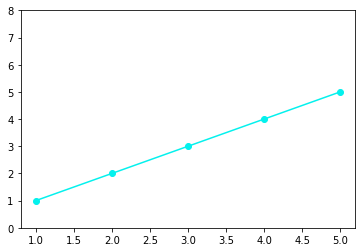

In [7]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, color = '#04f1ed', marker='o')
plt.ylim(0, 8)

In [9]:
#가설함수 만들기
v = [1., 2., 3., 4.]
print(tf.reduce_mean(v))

tf.Tensor(2.5, shape=(), dtype=float32)


In [10]:
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [11]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b
print(hypothesis)

tf.Tensor([ 2.5  4.5  6.5  8.5 10.5], shape=(5,), dtype=float32)


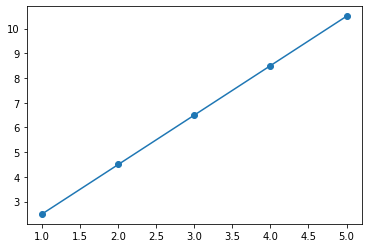

In [21]:
plt.plot(x_data, hypothesis.numpy(), marker='o') #plot linear regression line

In [18]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [19]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

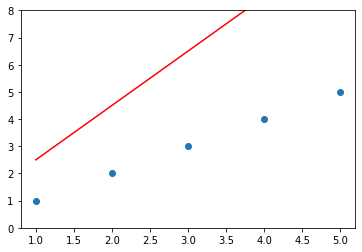

In [20]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

Hypothesis
𝐻(𝑥)=𝑊𝑥+𝑏

Cost
𝑐𝑜𝑠𝑡(𝑊)=1/𝑚∑𝑖=1/𝑚(𝑊𝑥𝑖−𝑦𝑖)^2

In [22]:
#비용: 
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [29]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    print(hypothesis - y_data)
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b]) #기울기 구하기
W_grad.numpy(), b_grad.numpy()

tf.Tensor([1.5 2.5 3.5 4.5 5.5], shape=(5,), dtype=float32)


(25.0, 7.0)

In [30]:
#parameter 업데이트
learning_rate = 0.01 #학습률

W.assign_sub(learning_rate * W_grad) #weight의 기울기 * 학습률
b.assign_sub(learning_rate * b_grad) #bias의 기울기 * 학습률

W.numpy(), b.numpy()

(1.75, 0.43)

(0, 8)

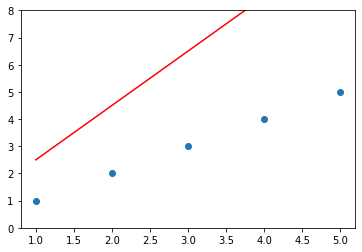

In [31]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0, 8)

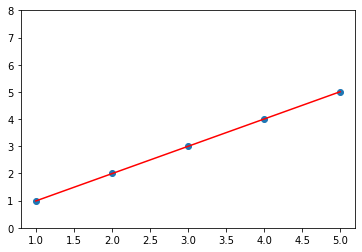

In [32]:
#weight값 조정
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)